# Exercise 1 - Toffoli gate solution
**Created by:** Marcel Pfaffhauser

In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# useful to have pi
import math
pi=math.pi

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

## Simplest solution

We know that on a real device only the mentioned 4 gates are allowed, so for this reason we can just look how our circuit would look like when it is transpiled to a real device. I choose ibmq_5_yorktown here (since 5 qubits are enough), but you can choose any other real device. 


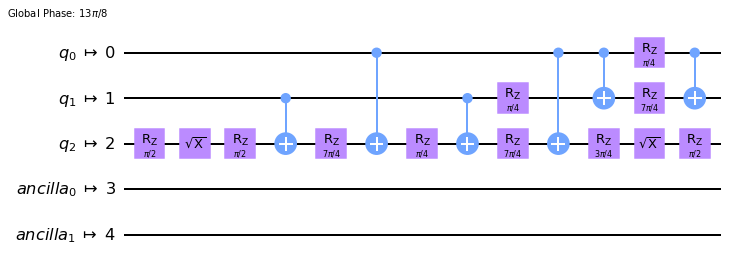

In [2]:
device = provider.get_backend('ibmq_5_yorktown')

qc=QuantumCircuit(3)
qc.ccx(0,1,2)
new_circuit = transpile(qc,backend=device)
new_circuit.draw(output='mpl')

The above circuit is automatically created, everytime you send a CCX to a real quantum device, by the transpiler.

## Textbook solution

Alternatively you can find several explanations on how one can construct a toffoli gate. One of them is in the qiskit textbook. The easiest way to construct a toffoli gate is using Hadamard gates and T gates.
In the qiskit textbook under https://qiskit.org/textbook/ch-gates/more-circuit-identities.html this is shown with the picture below.


<img src="Toffoli2.png">

When we look at this circuit we can see that there are two swap operations at the end. As the textbook states this is only there because q0 is not connected with q1, so for a general case we can leave the swap away, since that depends on the coupling map of the actual device. (So we have the CX and T dagger on q1 instead of q2).

After we leave the swaps away we can see that the circuit only consists of 4 gates: The Hadamard gate, the CX gate and the T gate as well as its conjugate transpose. When we look up the T gate, we find that the T gate is actually a rotation around Z-axis with $\pi/4$, so we can use the Rz gate with the rotation $\phi$ equal to $\pi/4$ to construct it. To construct T dagger we just use an Rz gate with the opposite rotation. Since a whole rotation is $2 \pi $ we can just calculate the rotation as $2 \pi -\pi/4 = 7 \pi /4$. 

We have seen above, that we can construct a Hadamard gate by using two Rz gates and an SX gate. 
If we now replace all the Hadamard Gates as well as the T gates and T dagger gates with their deconstruction we get the following:

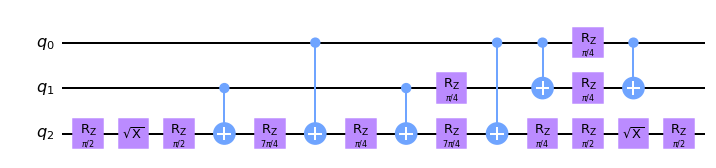

In [3]:
qc = QuantumCircuit(3)
theta = pi # Theta can be anything (pi chosen arbitrarily)

# qc.h(2) gets replaced with
qc.rz(pi/2, 2)
qc.sx(2)
qc.rz(pi/2, 2)
#already basic gate
qc.cx(1,2)
# qc.tdg(2) gets replaced with
qc.rz(7*pi/4, 2)
#already basic gate
qc.cx(0,2)
# qc.t(2) gets replaced with
qc.rz(pi/4, 2)
#Already a basic gate
qc.cx(1,2)
# qc.tdg(2) gets replaced with
qc.rz(7*pi/4, 2)
#already a basic gate
qc.cx(0,2)
# qc.t(1) gets replaced with
qc.rz(pi/4, 1)
# qc.t(2) gets replaced with
qc.rz(pi/4, 2)
# qc.h(2) gets replaced with
qc.rz(pi/2, 2)
qc.sx(2)
qc.rz(pi/2, 2)
#Already a basic gate
qc.cx(0,1)
# qc.t(0) gets replaced with
qc.rz(pi/4, 0)
# qc.tdg(1) gets replaced with
qc.rz(pi/4, 1)
#already a basic gate
qc.cx(0,1)

qc.draw()

This looks almost the same as the circuit we got from the transpiler above. The only difference is that on q2 after the last CX gate there are two Rz gates after each other instead of just one. Since these are both just rotations around the Z-Axis we can combine these two rotations into one rotation, and then we have the same result as the compiler above.